1. Data Exploration


In [100]:
import pandas as pd

In [101]:
# Load the dataset
df = pd.read_csv('twitter_csv.csv', encoding='ISO-8859-1')

In [102]:
# Explore the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1048575 non-null  int64 
 1   1467810369                                                                                                           1048575 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1048575 non-null  object
 3   NO_QUERY                                                                                                             1048575 non-null 

In [103]:
print("\nFirst few rows:")
print(df.head())


First few rows:
   0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for the ball. Man...                                                                   
2    my whole body feels itchy and like its on fire                                                                    
3  @nationwideclass no, it's not behaving at a

In [104]:
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

2. Data Cleaning

In [105]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64


In [106]:
# Handle duplicates
df.drop_duplicates(inplace=True)

In [107]:
# Drop irrelevant columns
df = df.drop(columns=['id', 'date', 'flag', 'user'])

In [108]:
print("\nCleaned dataset:")
print(df.head())


Cleaned dataset:
   target                                               text
0       0  is upset that he can't update his Facebook by ...
1       0  @Kenichan I dived many times for the ball. Man...
2       0    my whole body feels itchy and like its on fire 
3       0  @nationwideclass no, it's not behaving at all....
4       0                      @Kwesidei not the whole crew 


3. Exploratory Data Analysis (EDA)

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df['target'].value_counts()

target
0    799999
4    248576
Name: count, dtype: int64

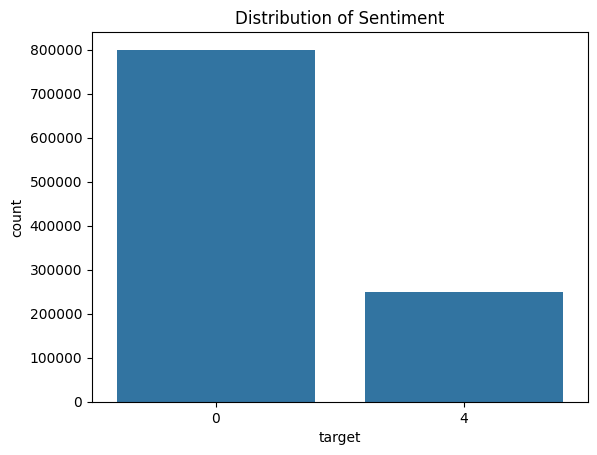

In [111]:
sns.countplot(data = df,x='target')
plt.title('Distribution of Sentiment')
plt.show()

In [112]:
from wordcloud import WordCloud

In [113]:
positive_words = ' '.join([text for text in df[df['target'] == 4]['text']])
negative_words = ' '.join([text for text in df[df['target'] == 0]['text']])

In [114]:
wordcloud_positive = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
wordcloud_negative = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)


Text(0.5, 1.0, 'Positive Sentiment Word Cloud')

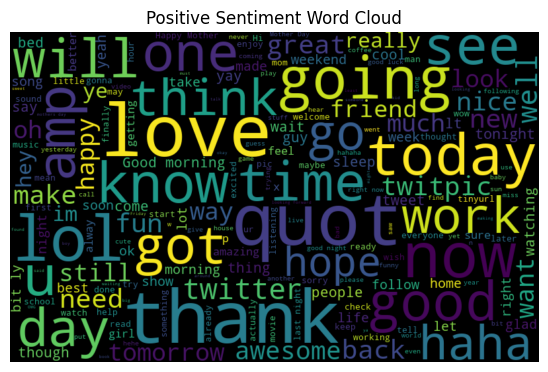

In [115]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')

Text(0.5, 1.0, 'Negative Sentiment Word Cloud')

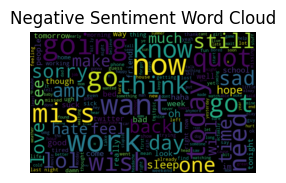

In [116]:
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')

In [117]:
plt.show()

4. Sentiment Distribution

In [118]:
print("Sentiment Class Balance:")
print(df['target'].value_counts())

Sentiment Class Balance:
target
0    799999
4    248576
Name: count, dtype: int64


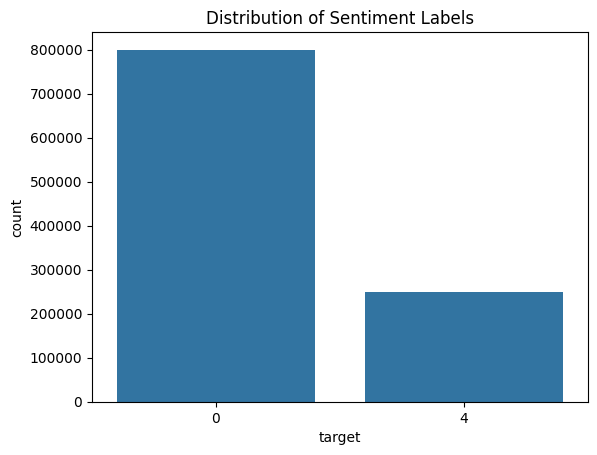

In [119]:
sns.countplot(x='target', data=df)
plt.title('Distribution of Sentiment Labels')
plt.show()


5. Word Frequency Analysis

In [120]:
from collections import Counter

In [121]:
# Function to get most common words
def get_most_common_words(text, num=20):
    words = ' '.join(text).split()
    word_freq = Counter(words)
    return word_freq.most_common(num)

In [122]:
# Most common words in positive and negative tweets
positive_common_words = get_most_common_words(df[df['target'] == 4]['text'])
negative_common_words = get_most_common_words(df[df['target'] == 0]['text'])

In [123]:
print("Most common words in positive tweets:")
print(positive_common_words)
print("\nMost common words in negative tweets:")
print(negative_common_words)

Most common words in positive tweets:
[('to', 78540), ('the', 76134), ('I', 61206), ('a', 60469), ('you', 43318), ('and', 42327), ('for', 35787), ('my', 34863), ('is', 31510), ('in', 29285), ('of', 28045), ('i', 27199), ('it', 25547), ('on', 24053), ('with', 18835), ('that', 17818), ('have', 17411), ('me', 16407), ('be', 16245), ('so', 15843)]

Most common words in negative tweets:
[('to', 306518), ('I', 299844), ('the', 241002), ('a', 175824), ('my', 166922), ('i', 160106), ('and', 140239), ('is', 118126), ('in', 108410), ('for', 96298), ('it', 91088), ('of', 90913), ('have', 77877), ('on', 77566), ('you', 75490), ('so', 72739), ('me', 69347), ('but', 68268), ('that', 61908), ('not', 61389)]


6. Temporal Analysis

In [124]:
# Load the dataset
df = pd.read_csv('twitter_csv.csv', encoding='ISO-8859-1')  

#Rename columns for clarity 
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

print(df.head())

   target          id                          date      flag           user  \
0       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4       0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                                text  
0  is upset that he can't update his Facebook by ...  
1  @Kenichan I dived many times for the ball. Man...  
2    my whole body feels itchy and like its on fire   
3  @nationwideclass no, it's not behaving at all....  
4                      @Kwesidei not the whole crew   


C:\Users\Daaravath priyanka\AppData\Local\Temp\ipykernel_1420\1684321856.py:2: FutureWarning: Parsed string "Mon Apr 06 22:19:49 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


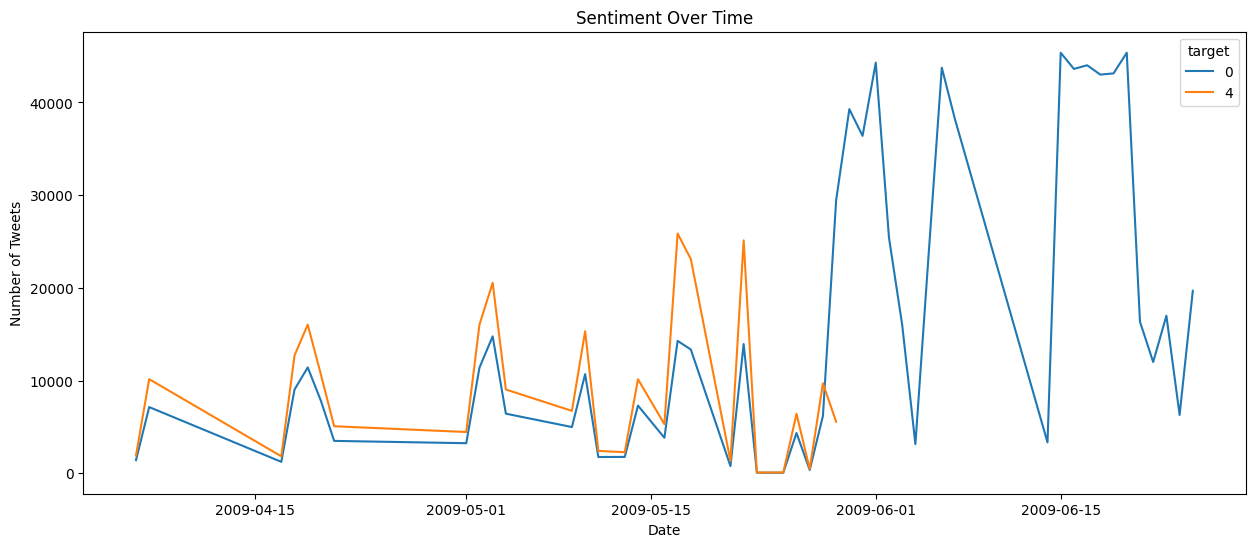

In [125]:
# Convert date to datetime and extract necessary components
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Group by date and sentiment
sentiment_over_time = df.groupby([df['date'].dt.date, 'target']).size().unstack()

# Plot sentiment over time
sentiment_over_time.plot(figsize=(15, 6))
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

7. Text Preprocessing

In [127]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define the text preprocessing function
def preprocess_text(text):
    try:
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
        # Remove special characters, numbers, and punctuation
        text = re.sub(r'[^A-Za-z\s]', '', text)
        # Convert to lowercase
        text = text.lower()
        # Tokenize text
        words = word_tokenize(text)
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]
        # Lemmatize words
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]
        # Join words back into a single string
        clean_text = ' '.join(words)
        return clean_text
    except Exception as e:
        print(f"Error processing text: {text}\nError: {e}")
        return text  # Return original text if an error occurs

[nltk_data] Downloading package punkt_tab to C:\Users\Daaravath
[nltk_data]     priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Daaravath
[nltk_data]     priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Daaravath
[nltk_data]     priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Daaravath
[nltk_data]     priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [128]:
df['clean_text'] = df['text'].apply(preprocess_text)

print("\nPreprocessed text:")
print(df[['text', 'clean_text']].head())


Preprocessed text:
                                                text  \
0  is upset that he can't update his Facebook by ...   
1  @Kenichan I dived many times for the ball. Man...   
2    my whole body feels itchy and like its on fire    
3  @nationwideclass no, it's not behaving at all....   
4                      @Kwesidei not the whole crew    

                                          clean_text  
0  upset cant update facebook texting might cry r...  
1  kenichan dived many time ball managed save res...  
2                    whole body feel itchy like fire  
3           nationwideclass behaving im mad cant see  
4                                kwesidei whole crew  


8. Sentiment Prediction Model


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['target'], test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_vec)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8050592470734091
F1 Score: 0.7576757625861208

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89    160026
           4       0.84      0.22      0.35     49689

    accuracy                           0.81    209715
   macro avg       0.82      0.60      0.62    209715
weighted avg       0.81      0.81      0.76    209715



9. Feature Importance

In [133]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import numpy as np

# Prepare the data
X_train = df['text']  # The text data
y_train = df['target']  # The target data

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Get feature importance
feature_names = vectorizer.get_feature_names_out()
feature_importance = model.coef_.flatten()

# Top positive and negative words
top_positive_words = np.argsort(feature_importance)[-10:]
top_negative_words = np.argsort(feature_importance)[:10]

print("Top positive words:", feature_names[top_positive_words])
print("Top negative words:", feature_names[top_negative_words])

c:\Users\Daaravath priyanka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Top positive words: ['congratulations' 'worries' 'yayyy' 'blessed' 'yayy' 'realhughjackman'
 'thankyou' 'pleasure' '3hotwords' 'smiling']
Top negative words: ['fathers' 'iran' 'depressed' 'gutted' 'missin' 'ruined' 'bummed'
 'depressing' 'peterfacinelli' 'disappointing']
